In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
#HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('titles.csv', index_col=None)
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [4]:
cast = pd.read_csv('cast.csv',index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# 1. Define a year as "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [5]:
# Filter for rows where the character name contains "Superman" or "Batman"
superman_batman_roles = cast[cast['character'].str.contains('Superman|Batman', case=False, na=False)]

# Create a new column to categorize characters as "Superman" or "Batman"
superman_batman_roles['hero'] = superman_batman_roles['character'].apply(lambda x: 'Superman' if 'Superman' in x else 'Batman')

# Group the data by year and character category, then count the number of characters
character_counts = superman_batman_roles.groupby(['year', 'hero'])['character'].count().unstack(fill_value=0)

# Find the years that are "Superman years" (more Superman characters than Batman characters)
superman_years = character_counts[character_counts['Superman'] > character_counts['Batman']]

# Count the number of "Superman years"
num_superman_years = len(superman_years)

print("Number of years in film history that have been Superman years:", num_superman_years)


Number of years in film history that have been Superman years: 14


C:\Users\manthan mankar\AppData\Local\Temp\ipykernel_7384\2510769214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superman_batman_roles['hero'] = superman_batman_roles['character'].apply(lambda x: 'Superman' if 'Superman' in x else 'Batman')


# 2. How many years have "Batman years". with more Batman characters than Superman characters?

In [6]:
# Filter for rows where the character name contains "Superman" or "Batman"
superman_batman_roles = cast[cast['character'].str.contains('Superman|Batman', case=False, na=False)]

# Create a new column to categorize characters as "Superman" or "Batman"
superman_batman_roles['hero'] = superman_batman_roles['character'].apply(lambda x: 'Superman' if 'Superman' in x else 'Batman')

# Group the data by year and character category, then count the number of characters
character_counts = superman_batman_roles.groupby(['year', 'hero'])['character'].count().unstack(fill_value=0)

# Find the years that are "Batman years" (more Batman characters than Superman characters)
batman_years = character_counts[character_counts['Batman'] > character_counts['Superman']]

# Count the number of "Batman years"
num_batman_years = len(batman_years)

print("Number of years in film history that have been Batman years:", num_batman_years)


Number of years in film history that have been Batman years: 36


C:\Users\manthan mankar\AppData\Local\Temp\ipykernel_7384\3796296549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superman_batman_roles['hero'] = superman_batman_roles['character'].apply(lambda x: 'Superman' if 'Superman' in x else 'Batman')


# 3. Plot the number of actor roles each year and the number of actress roles each year over the history of film 

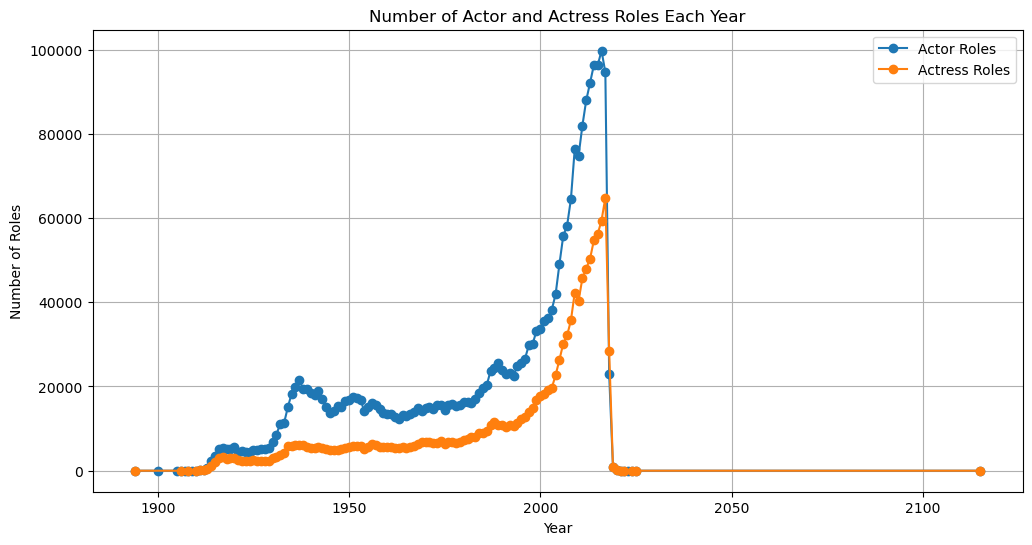

In [7]:
# Filter for actor roles
actor_roles = cast[cast['type'] == 'actor']

# Filter for actress roles
actress_roles = cast[cast['type'] == 'actress']

# Group the actor roles by year and count the number of roles for each year
actor_roles_count = actor_roles.groupby('year')['character'].count()

# Group the actress roles by year and count the number of roles for each year
actress_roles_count = actress_roles.groupby('year')['character'].count()

# Create a line plot to visualize the number of actor and actress roles each year
plt.figure(figsize=(12, 6))
plt.plot(actor_roles_count.index, actor_roles_count.values, label='Actor Roles', marker='o', linestyle='-')
plt.plot(actress_roles_count.index, actress_roles_count.values, label='Actress Roles', marker='o', linestyle='-')
plt.title('Number of Actor and Actress Roles Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend()
plt.grid(True)
plt.show()


# 4. Plot the number of actor each year and the number of actress roles each year, but this time as a kind = "area" plot

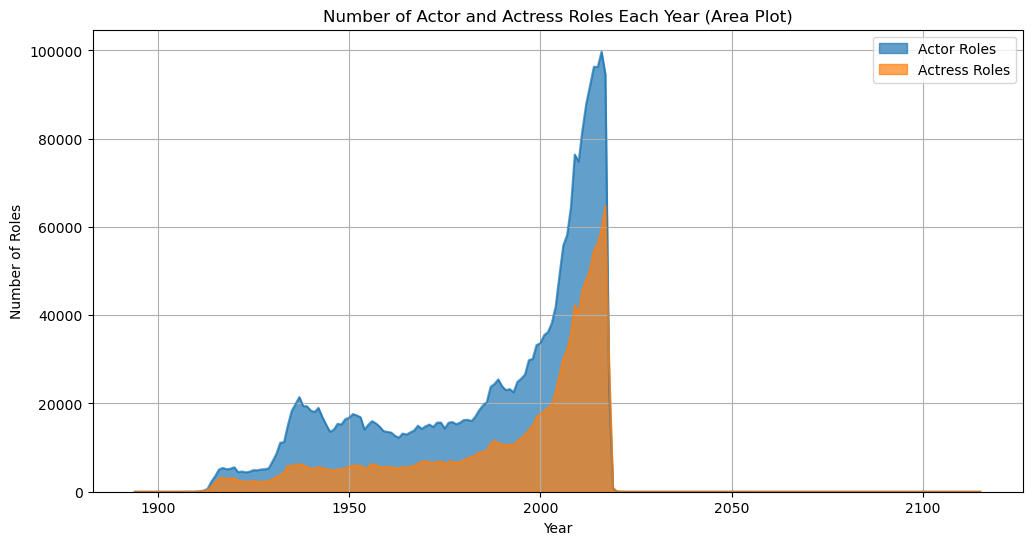

In [8]:
# Filter for actor roles
actor_roles = cast[cast['type'] == 'actor']

# Filter for actress roles
actress_roles = cast[cast['type'] == 'actress']

# Group the actor roles by year and count the number of roles for each year
actor_roles_count = actor_roles.groupby('year')['character'].count()

# Group the actress roles by year and count the number of roles for each year
actress_roles_count = actress_roles.groupby('year')['character'].count()

# Create an "area" plot to visualize the number of actor and actress roles each year
plt.figure(figsize=(12, 6))
actor_roles_count.plot(kind='area', label='Actor Roles', alpha=0.7)
actress_roles_count.plot(kind='area', label='Actress Roles', alpha=0.7)
plt.title('Number of Actor and Actress Roles Each Year (Area Plot)')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend()
plt.grid(True)
plt.show()


# 5. Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of films

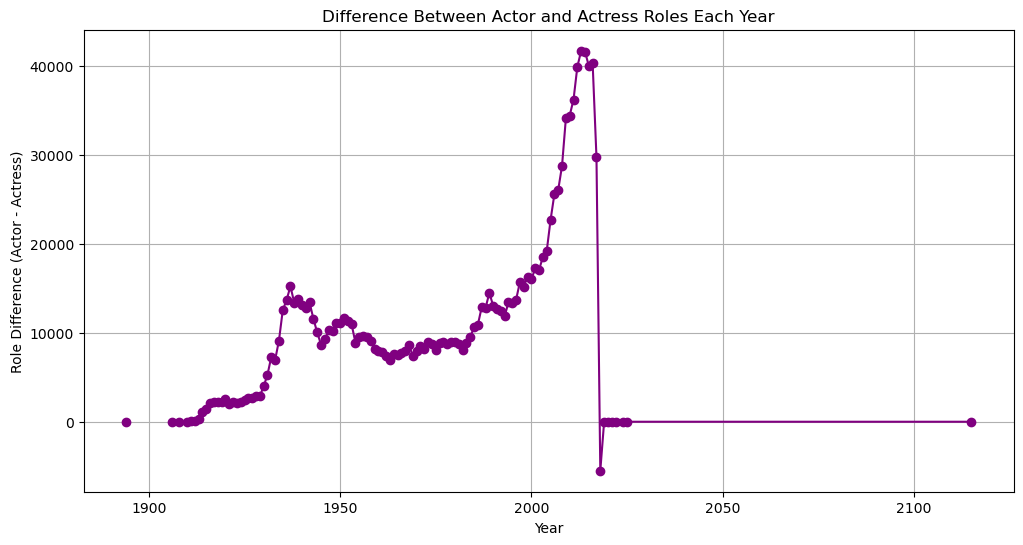

In [9]:
# Filter for actor roles
actor_roles = cast[cast['type'] == 'actor']

# Filter for actress roles
actress_roles = cast[cast['type'] == 'actress']

# Group the actor roles by year and count the number of roles for each year
actor_roles_count = actor_roles.groupby('year')['character'].count()

# Group the actress roles by year and count the number of roles for each year
actress_roles_count = actress_roles.groupby('year')['character'].count()

# Calculate the difference between actor and actress roles for each year
role_difference = actor_roles_count - actress_roles_count

# Create a line or bar plot to visualize the difference each year
plt.figure(figsize=(12, 6))
role_difference.plot(kind='line', marker='o', linestyle='-', color='purple')
# Uncomment the following line to use a bar plot instead
# role_difference.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Difference Between Actor and Actress Roles Each Year')
plt.xlabel('Year')
plt.ylabel('Role Difference (Actor - Actress)')
plt.grid(True)
plt.show()


# 6. Plot the fraction of roles that have been "actor" roles each year in the history of film

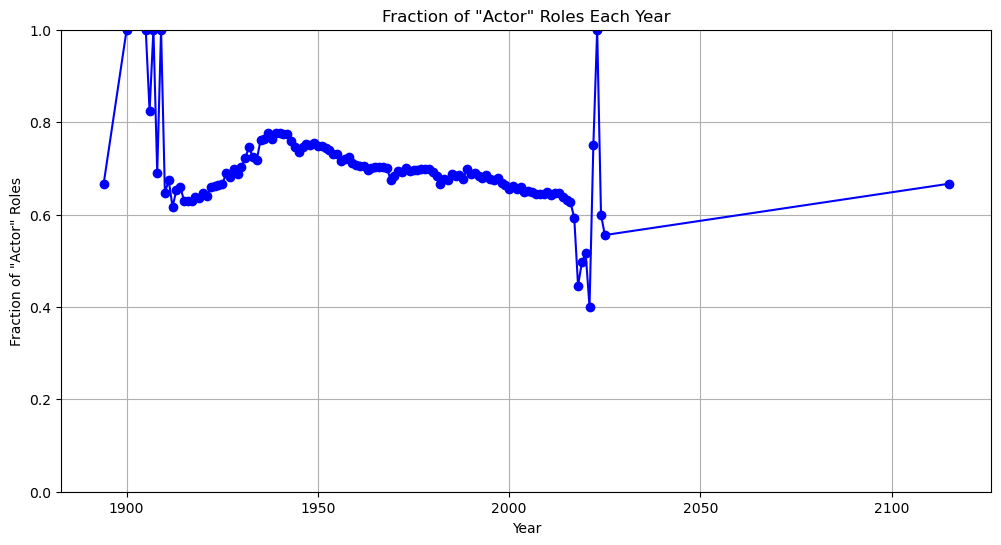

In [11]:
# Group the DataFrame by year and count the total number of roles for each year
total_roles_per_year = cast.groupby('year')['character'].count()

# Filter for actor roles and group by year to count the number of actor roles each year
actor_roles_per_year = cast[cast['type'] == 'actor'].groupby('year')['character'].count()

# Calculate the fraction of roles that are "actor" roles each year
fraction_actor_roles = actor_roles_per_year / total_roles_per_year

# Create a line or bar plot to visualize the fraction of actor roles each year
plt.figure(figsize=(12, 6))
fraction_actor_roles.plot(kind='line', marker='o', linestyle='-', color='blue')
# Uncomment the following line to use a bar plot instead
# fraction_actor_roles.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Fraction of "Actor" Roles Each Year')
plt.xlabel('Year')
plt.ylabel('Fraction of "Actor" Roles')
plt.grid(True)
plt.ylim(0, 1)  # Set the y-axis limit to the range [0, 1]
plt.show()


# 7. Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film 

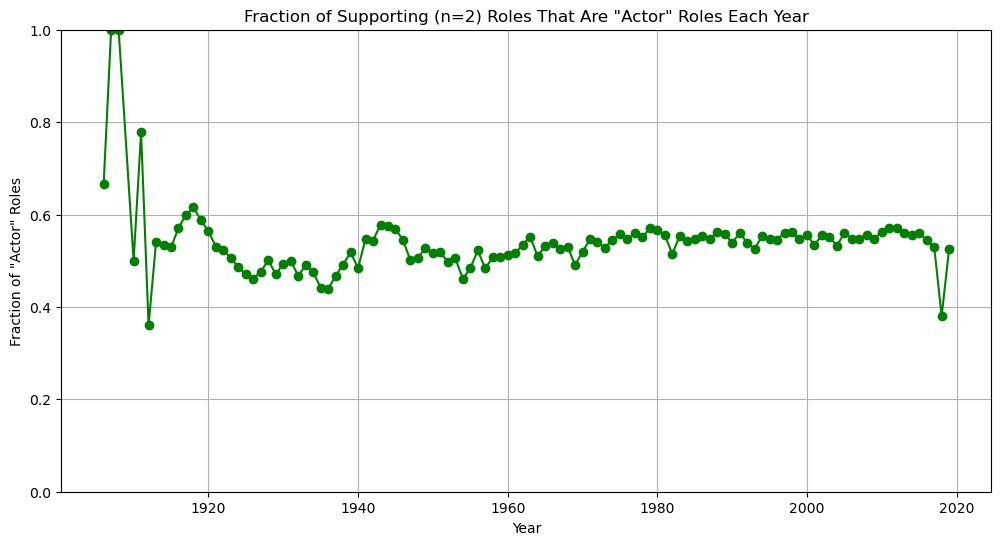

In [12]:
# Filter for roles where "n" is 2
supporting_roles_n2 = cast[cast['n'] == 2]

# Group the DataFrame by year and count the total number of supporting roles (n=2) for each year
total_supporting_roles_per_year = supporting_roles_n2.groupby('year')['character'].count()

# Filter for actor roles among the supporting roles (n=2) and group by year
actor_supporting_roles_per_year = supporting_roles_n2[supporting_roles_n2['type'] == 'actor'].groupby('year')['character'].count()

# Calculate the fraction of supporting (n=2) roles that are 'actor' roles each year
fraction_actor_supporting_roles = actor_supporting_roles_per_year / total_supporting_roles_per_year

# Create a line or bar plot to visualize the fraction each year
plt.figure(figsize=(12, 6))
fraction_actor_supporting_roles.plot(kind='line', marker='o', linestyle='-', color='green')
# Uncomment the following line to use a bar plot instead
# fraction_actor_supporting_roles.plot(kind='bar', color='green', alpha=0.7)
plt.title('Fraction of Supporting (n=2) Roles That Are "Actor" Roles Each Year')
plt.xlabel('Year')
plt.ylabel('Fraction of "Actor" Roles')
plt.grid(True)
plt.ylim(0, 1)  # Set the y-axis limit to the range [0, 1]
plt.show()


# 8. Build a plot with line for each rank n=1 through n=3, where the line shows what a fraction of that ranks role were 'actor' roles for each year in the history of film

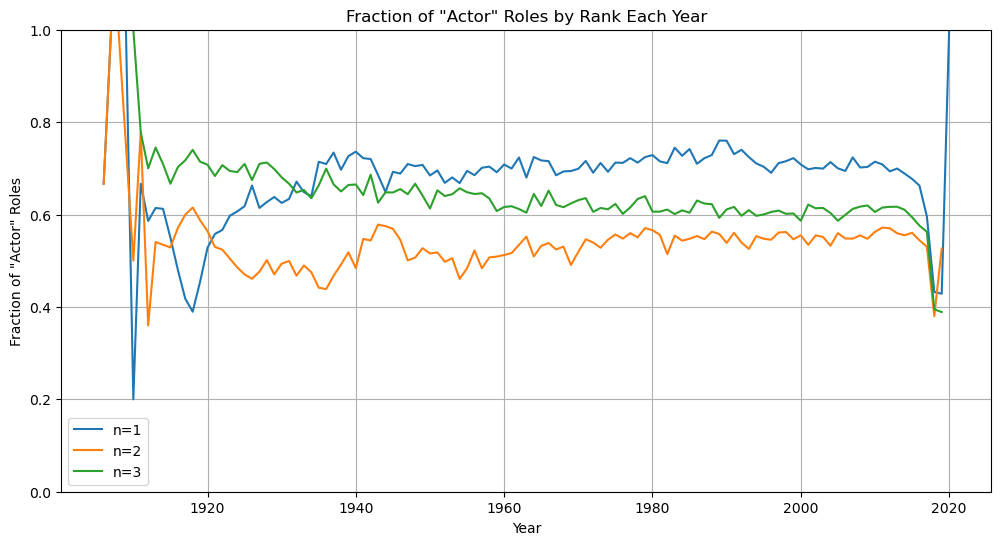

In [13]:
# Define a list of ranks (n=1, n=2, n=3)
ranks = [1, 2, 3]

# Create a subplot with multiple lines for each rank
plt.figure(figsize=(12, 6))

# Iterate through each rank
for rank in ranks:
    # Filter for roles with the current rank
    roles_by_rank = cast[cast['n'] == rank]
    
    # Group the DataFrame by year and count the total number of roles with the current rank for each year
    total_roles_per_year = roles_by_rank.groupby('year')['character'].count()
    
    # Filter for 'actor' roles among the roles with the current rank and group by year
    actor_roles_per_year = roles_by_rank[roles_by_rank['type'] == 'actor'].groupby('year')['character'].count()
    
    # Calculate the fraction of roles with the current rank that are 'actor' roles each year
    fraction_actor_roles = actor_roles_per_year / total_roles_per_year
    
    # Plot the fraction as a line for the current rank
    plt.plot(fraction_actor_roles.index, fraction_actor_roles.values, label=f'n={rank}')

# Customize the plot
plt.title('Fraction of "Actor" Roles by Rank Each Year')
plt.xlabel('Year')
plt.ylabel('Fraction of "Actor" Roles')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # Set the y-axis limit to the range [0, 1]

# Show the plot
plt.show()
